In [1]:
import cobra
import pandas as pd
from util.manipulation import load_latest_model
import numpy as np
import matplotlib.pyplot as plt

### Tutorial 1: General manipulations

This tutorial covers the general manipulations that can performed on the *i*JL208 model. The following basic manipulations are executed:

    1- Load the latest version of the model and display the number of reactions, genes and metabolites
    2- Get the optimal solution and growth rate prediction
    3- Get and display a predicted flux state, the number of used reactions
    4- Formulate a single gene essentiality prediction
    5- 

In [2]:
#Use the util function to load the latest model from the model_versions folder
model = load_latest_model()

In [5]:
#Display the number of reactions, genes and metabolites in the model
print(f"The {model.name} model contains {len(model.reactions)} reactions, {len(model.genes)} genes and {len(model.metabolites)} metabolites")

The iJL208 with inactive CHTNDAe model contains 364 reactions, 207 genes and 348 metabolites


In [6]:
#Get the predicted growth rate and validate that the model solves correctly
solution = model.optimize()
if solution.status == 'optimal':
    print(f"The {model.name} has an optimal solution and the predicted growth rate is: {solution.objective_value}")
else:
    raise ValueError(f"The model does not have an optimal solution, ensure the )

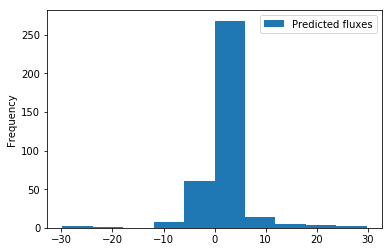

In [11]:
#Plot the predicted flux state
predicted_fluxes = pd.DataFrame({'Predicted fluxes':solution.fluxes.to_list()},index=solution.fluxes.index.to_list())
predicted_fluxes.plot(kind='hist')

In [14]:
#Get the number of used/unused reactions, those are the reactions for which no flux is predicted
used_reactions = predicted_fluxes[predicted_fluxes['Predicted fluxes']!=0]
unused_reactions = predicted_fluxes[predicted_fluxes['Predicted fluxes']==0]
print(f"The model has {len(used_reactions)} used reactions and {len(unused_reactions)} unused reactions")

The model has 217 used reactions and 147 unused reactions


In [ ]:
#Formulate a single gene essentiality prediction
